In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

if sys.platform == 'win32':
    dir = r"D:\黑马课程\人工智能V3.0（尊享无忧）\00 课程资料\3.阶段三数据处理与统计分析\数据处理与统计分析v3.0视频（第二部分）\资料"
else:
    dir = r'/Users/wangrui/Desktop/00 课程资料/3.阶段三数据处理与统计分析/数据处理与统计分析v3.0视频（第二部分）/资料'
os.chdir(dir)

In [2]:
# 零售会员数据分析案例

In [3]:
custom_info = pd.read_excel('data/会员信息查询.xlsx')
custom_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952714 entries, 0 to 952713
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   会员卡号    952714 non-null  object        
 1   会员等级    952714 non-null  object        
 2   会员来源    952714 non-null  object        
 3   注册时间    952714 non-null  datetime64[ns]
 4   所属店铺编码  952714 non-null  object        
 5   门店店员编码  253828 non-null  object        
 6   省份      264801 non-null  object        
 7   城市      264758 non-null  object        
 8   性别      952714 non-null  object        
 9   生日      785590 non-null  object        
 10  年齡      952705 non-null  float64       
 11  生命级别    952714 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 87.2+ MB


In [4]:
custom_info.head()

,会员卡号,会员等级,会员来源,注册时间,所属店铺编码,门店店员编码,省份,城市,性别,生日,年齡,生命级别
0,BL6099033963550303769,黄金会员,线下扫码,2019-03-31 23:55:03.977,DPXX07,NaN,NaN,NaN,女,1975-04-04,43.0,活跃
1,BL6099033963450303763,黄金会员,线下扫码,2019-03-31 23:45:03.005,DPXX07,NaN,NaN,NaN,女,1982-04-02,36.0,活跃
2,BL6099033963464003767,白银会员,电商入口,2019-03-31 23:42:40.073,DPS00X,NaN,NaN,NaN,女,1988-08-13,30.0,沉睡
3,BL6099033963460503766,黄金会员,线下扫码,2019-03-31 23:42:05.516,DPXX07,NaN,NaN,NaN,女,1993-11-24,25.0,活跃
4,BL6099033963660603765,白银会员,电商入口,2019-03-31 23:26:02.402,DPS00X,NaN,NaN,NaN,女,1993-03-20,26.0,沉睡


In [5]:
from datetime import datetime
custom_info.loc[:, '注册年月'] = custom_info['注册时间'].apply(lambda x: x.strftime('%Y-%m'))
custom_info[['会员卡号','会员等级','会员来源','注册时间','注册年月']].head()

,会员卡号,会员等级,会员来源,注册时间,注册年月
0,BL6099033963550303769,黄金会员,线下扫码,2019-03-31 23:55:03.977,2019-03
1,BL6099033963450303763,黄金会员,线下扫码,2019-03-31 23:45:03.005,2019-03
2,BL6099033963464003767,白银会员,电商入口,2019-03-31 23:42:40.073,2019-03
3,BL6099033963460503766,黄金会员,线下扫码,2019-03-31 23:42:05.516,2019-03
4,BL6099033963660603765,白银会员,电商入口,2019-03-31 23:26:02.402,2019-03


In [6]:
custom_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952714 entries, 0 to 952713
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   会员卡号    952714 non-null  object        
 1   会员等级    952714 non-null  object        
 2   会员来源    952714 non-null  object        
 3   注册时间    952714 non-null  datetime64[ns]
 4   所属店铺编码  952714 non-null  object        
 5   门店店员编码  253828 non-null  object        
 6   省份      264801 non-null  object        
 7   城市      264758 non-null  object        
 8   性别      952714 non-null  object        
 9   生日      785590 non-null  object        
 10  年齡      952705 non-null  float64       
 11  生命级别    952714 non-null  object        
 12  注册年月    952714 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 94.5+ MB


In [7]:
month_count = custom_info.groupby('注册年月')[['会员卡号']].count().rename(columns={'会员卡号': '月增量'})
month_count.head()

,月增量
注册年月,
2017-08,392910
2017-09,760
2017-10,996
2017-11,1710
2017-12,4165


In [8]:
type(month_count)

pandas.core.frame.DataFrame

In [9]:
custom_info.pivot_table(index='注册年月', values='会员卡号', aggfunc='count')

,会员卡号
注册年月,
2017-08,392910
2017-09,760
2017-10,996
2017-11,1710
2017-12,4165
2018-01,15531
2018-02,13798
2018-03,49320
2018-04,71699


In [10]:
month_count.loc[:, '存量'] = month_count['月增量'].cumsum()
month_count

,月增量,存量
注册年月,,
2017-08,392910,392910
2017-09,760,393670
2017-10,996,394666
2017-11,1710,396376
2017-12,4165,400541
2018-01,15531,416072
2018-02,13798,429870
2018-03,49320,479190
2018-04,71699,550889


In [18]:
month_count = month_count[1:]
month_count

,月增量,存量
注册年月,,
2017-09,760,393670
2017-10,996,394666
2017-11,1710,396376
2017-12,4165,400541
2018-01,15531,416072
2018-02,13798,429870
2018-03,49320,479190
2018-04,71699,550889
2018-05,27009,577898


Text(0.5, 1.0, '会员存量增量分析')

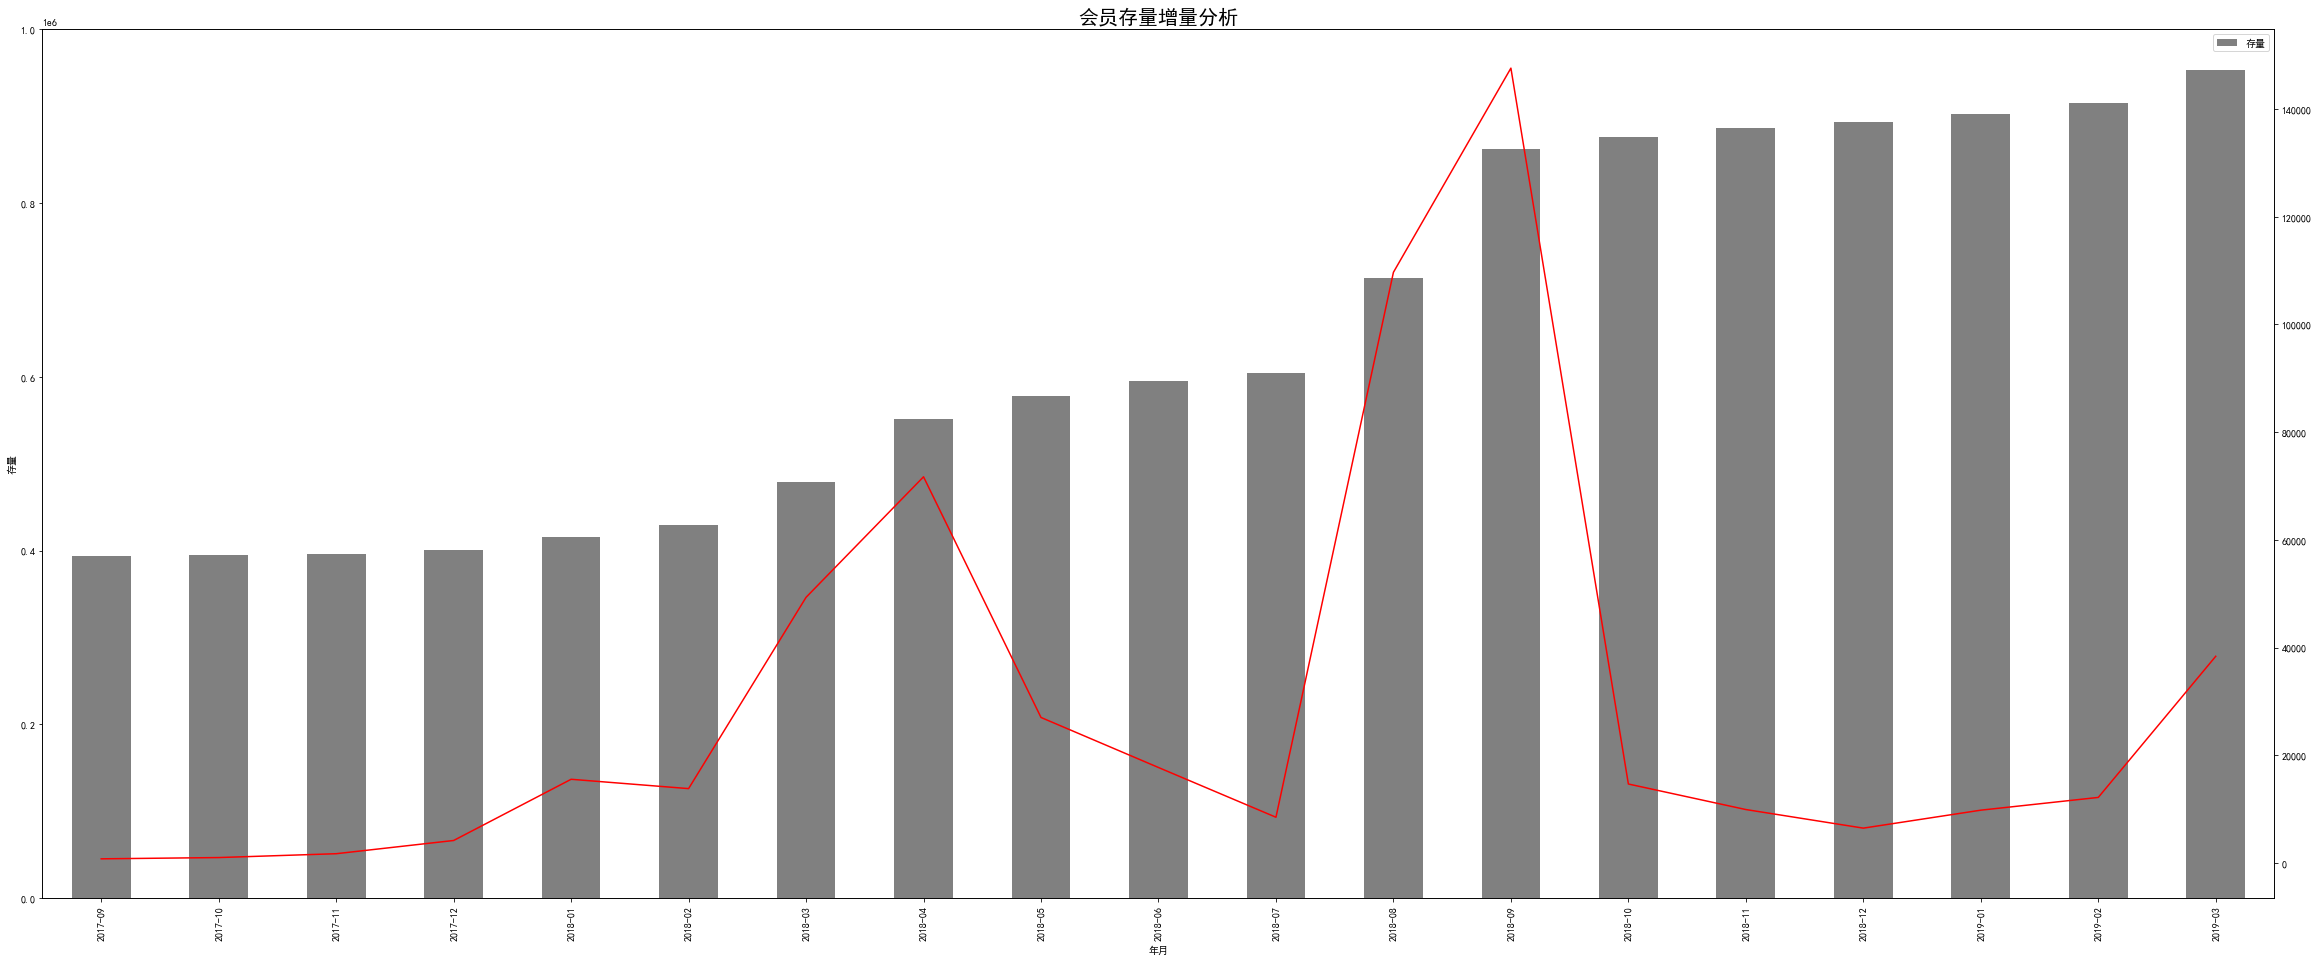

In [19]:
plt.rcParams['font.sans-serif'] = ['SimHei']
month_count['月增量'].plot(figsize=(20, 8),color='red', secondary_y=True)
month_count['存量'].plot(kind='bar', figsize=(20, 8), color='gray', legend=True, xlabel='年月', ylabel='存量')
plt.title("会员存量增量分析",fontsize=20)

In [21]:
month_degree_count = custom_info.groupby(['注册年月', '会员等级'])[['会员卡号']].count()
month_degree_count

会员卡号
注册年月    会员等级        
2017-08 白银会员  376648
        钻石会员     185
        铂金会员     387
        黄金会员   15690
2017-09 白银会员     530
...              ...
2019-02 黄金会员    8140
2019-03 白银会员   10580
        钻石会员       3
        铂金会员      37
        黄金会员   27752

[80 rows x 1 columns]

In [22]:
month_degree_count.reset_index()

,注册年月,会员等级,会员卡号
0,2017-08,白银会员,376648
1,2017-08,钻石会员,185
2,2017-08,铂金会员,387
3,2017-08,黄金会员,15690
4,2017-09,白银会员,530
...,...,...,...
75,2019-02,黄金会员,8140
76,2019-03,白银会员,10580
77,2019-03,钻石会员,3
78,2019-03,铂金会员,37


In [23]:
month_degree_count.unstack()

会员卡号                 
会员等级       白银会员 钻石会员 铂金会员   黄金会员
注册年月                            
2017-08  376648  185  387  15690
2017-09     530    3   10    217
2017-10     603   13   17    363
2017-11    1311   19   20    360
2017-12    3512   15   24    614
2018-01   11244   24   64   4199
2018-02    9937    9   34   3818
2018-03   41546   57   94   7623
2018-04   62613   48   83   8955
2018-05   19317   19   56   7617
2018-06   11292    7   23   6396
2018-07    3932    8   28   4515
2018-08   95584   27   65  13998
2018-09  133090   20   63  14412
2018-10    9093   15   34   5512
2018-11    6313    4   29   3566
2018-12    2808    3   29   3620
2019-01    3661    5    9   6120
2019-02    4001    5   17   8140
2019-03   10580    3   37  27752

In [24]:
member_rating = custom_info.pivot_table(index='注册年月', columns='会员等级', values='会员卡号', aggfunc='count')
member_rating

会员等级,白银会员,钻石会员,铂金会员,黄金会员
注册年月,,,,
2017-08,376648,185,387,15690
2017-09,530,3,10,217
2017-10,603,13,17,363
2017-11,1311,19,20,360
2017-12,3512,15,24,614
2018-01,11244,24,64,4199
2018-02,9937,9,34,3818
2018-03,41546,57,94,7623
2018-04,62613,48,83,8955


Text(0.5, 1.0, '会员增量等级分布')

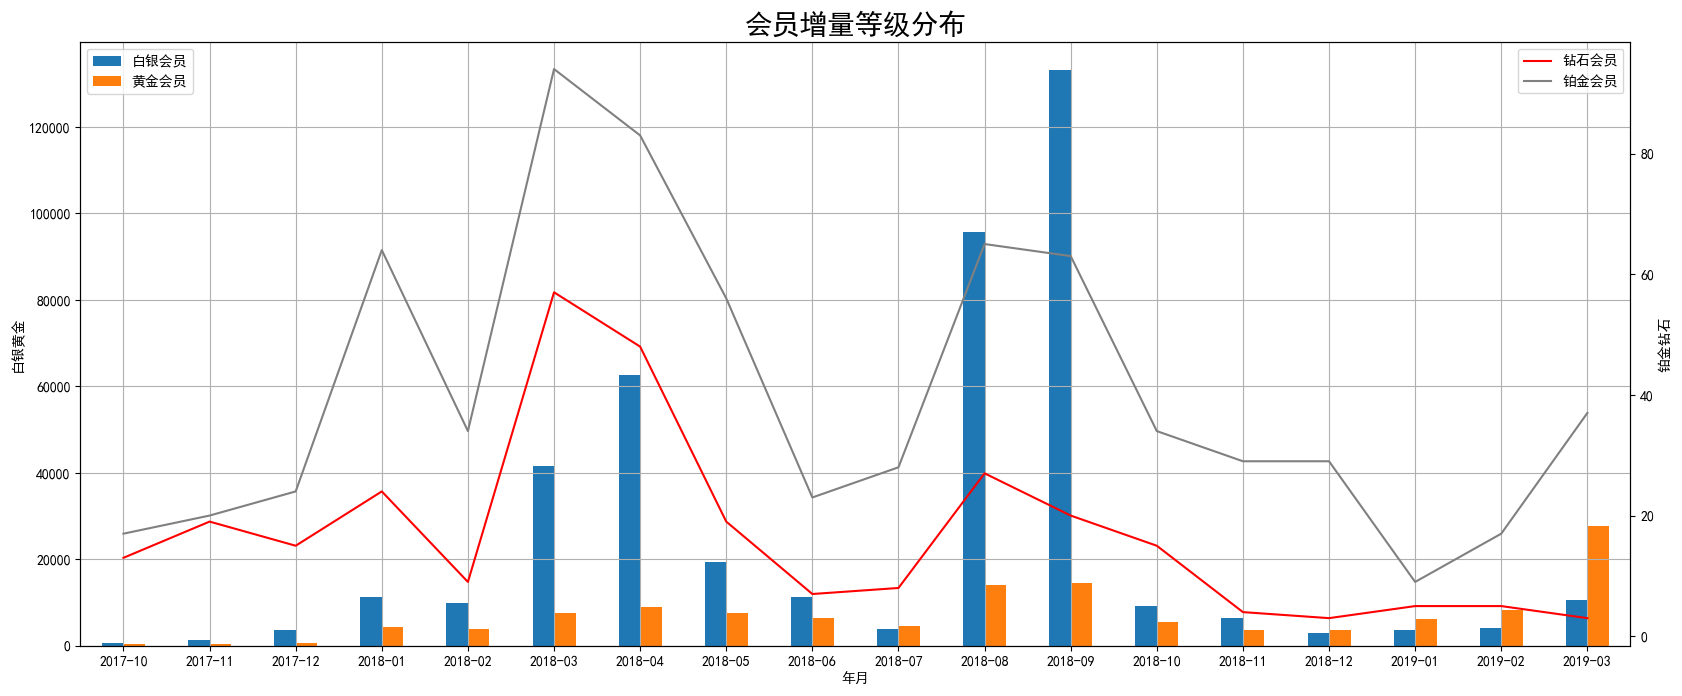

In [26]:
member_rating = member_rating[1:] # 去掉第一个月的异常数据
## 画图显示增量等级
fig, ax1 = plt.subplots(figsize=(20, 8), dpi=100)
ax2 = ax1.twinx()
member_rating[['白银会员', '黄金会员']].plot.bar(ax=ax1, rot=0, grid=True, xlabel='年月',ylabel = '白银黄金')
ax1.legend(loc='upper left')
member_rating[['钻石会员', '铂金会员']].plot(ax=ax2, color=['red', 'gray'], ylabel='铂金钻石')
ax2.legend(loc='upper right') # loc参数 可以设置不同位置ax2.legend(loc='upper/bottom left/center/right')
plt.title('会员增量等级分布', fontsize= 20)

In [27]:
#各地区会销比
custom_consume=pd.read_excel('data/会员消费报表.xlsx')
all_orders=pd.read_excel('data/全国销售订单数量表.xlsx')
store_info=pd.read_excel('data/门店信息表.XLSX')
custom_consume.head()

,卡号,订单日期,订单号,订单类型,店铺代码,款号,尺码,消费数量,消费金额,当前积分
0,HS340766JAF6,2018-11-30,ODLOX6BXX8X2BXBBBBX,下单,DPX60X,BLA267Q3X13AQM,230,1,1200.0,800
1,BL6093039999465603590,2018-11-30,ODODOXF77X8X2BXBBBB2,下单,DPX377,BLA2651QX14AQC,240,1,1332.0,2531
2,BL6093909593939600407,2018-11-30,ROX8XXFBBBB6BB,退单,DPS00X,TMA27727X5QAQM,240,-1,-112.5,328
3,BL6093036096030709394,2018-11-30,ROX8XXFBBBB6X7,退单,DPS00X,TMA67621X5QBQTM,230,-1,-60.0,1038
4,BL6093993066943700650,2018-11-30,ODLOX6BFX8XXFBBBBBX,下单,DPX603,BLA26663X52AQTM,235,1,1200.0,800


In [31]:
custom_consume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203437 entries, 0 to 203436
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   卡号      203437 non-null  object 
 1   订单日期    203437 non-null  object 
 2   订单号     203437 non-null  object 
 3   订单类型    203437 non-null  object 
 4   店铺代码    203437 non-null  object 
 5   款号      203437 non-null  object 
 6   尺码      203437 non-null  int64  
 7   消费数量    203437 non-null  int64  
 8   消费金额    203437 non-null  float64
 9   当前积分    203437 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 15.5+ MB


In [30]:
all_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   年月      8500 non-null   int64  
 1   地区代码    8500 non-null   object 
 2   店铺代码    8500 non-null   object 
 3   全部订单数   8500 non-null   int64  
 4   会员订单数   5252 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 332.2+ KB


In [29]:
store_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   店铺代码    791 non-null    object 
 1   地区编码    791 non-null    object 
 2   渠道大类    791 non-null    object 
 3   商圈等级描述  764 non-null    object 
 4   商圈类别描述  749 non-null    object 
 5   店铺位置    748 non-null    object 
 6   店铺状态    791 non-null    object 
 7   仓储类别    791 non-null    object 
 8   营业员数    784 non-null    float64
 9   仓储面积    673 non-null    object 
 10  店铺等级    765 non-null    object 
 11  店铺时尚度   773 non-null    float64
 12  接受价格等级  757 non-null    object 
 13  店铺类型    768 non-null    float64
 14  装修代数    703 non-null    object 
dtypes: float64(3), object(12)
memory usage: 92.8+ KB


In [32]:
custom_consume.loc[:, '年月'] = pd.to_datetime(custom_consume['订单日期']).apply(lambda x: datetime.strftime(x, '%Y%m')).astype(int)
custom_consume.head()

,卡号,订单日期,订单号,订单类型,店铺代码,款号,尺码,消费数量,消费金额,当前积分,年月
0,HS340766JAF6,2018-11-30,ODLOX6BXX8X2BXBBBBX,下单,DPX60X,BLA267Q3X13AQM,230,1,1200.0,800,201811
1,BL6093039999465603590,2018-11-30,ODODOXF77X8X2BXBBBB2,下单,DPX377,BLA2651QX14AQC,240,1,1332.0,2531,201811
2,BL6093909593939600407,2018-11-30,ROX8XXFBBBB6BB,退单,DPS00X,TMA27727X5QAQM,240,-1,-112.5,328,201811
3,BL6093036096030709394,2018-11-30,ROX8XXFBBBB6X7,退单,DPS00X,TMA67621X5QBQTM,230,-1,-60.0,1038,201811
4,BL6093993066943700650,2018-11-30,ODLOX6BFX8XXFBBBBBX,下单,DPX603,BLA26663X52AQTM,235,1,1200.0,800,201811


In [33]:
custom_consume=pd.merge(custom_consume,store_info[['店铺代码','地区编码']],on='店铺代码')
custom_consume.head()

,卡号,订单日期,订单号,订单类型,店铺代码,款号,尺码,消费数量,消费金额,当前积分,年月,地区编码
0,HS340766JAF6,2018-11-30,ODLOX6BXX8X2BXBBBBX,下单,DPX60X,BLA267Q3X13AQM,230,1,1200.0,800,201811,GBL6140
1,BL6093996469665709064,2018-11-28,ODROX6BXX8XX28BBBB2,退单,DPX60X,BLA26725X13AQTM,235,-1,-1200.0,100,201811,GBL6140
2,BL6093996469665709064,2018-11-28,ODLOX6BXX8XX28BBBBX,下单,DPX60X,BLA26725X13AQTM,235,1,1200.0,900,201811,GBL6140
3,BL6093996469665709064,2018-11-27,ODROX6BXX8XX29BBBBX,退单,DPX60X,BLA26725X13AQTM,235,-1,-1200.0,900,201811,GBL6140
4,BL6093996469665709064,2018-11-27,ODLOX6BXX8XX28BBBB2,下单,DPX60X,BLA26725X13AQTM,235,1,1200.0,1700,201811,GBL6140


In [34]:
# margins参数 每行每列求和
member_orders=custom_consume[custom_consume['地区编码']!='GBL6D01'].pivot_table(values = '消费数量',index='地区编码',columns='年月',aggfunc=sum,margins=True)
member_orders

年月,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,All
地区编码,,,,,,,,,,,,,,
GBL6010,127,74,145,113,70,35,45,82,56,61,51,43,253,1155
GBL6020,15,31,15,5,499,593,90,980,588,80,8,55,291,3250
GBL6030,1989,1503,2572,3264,4079,4023,3349,4434,5198,3499,2386,2725,3660,42681
GBL6040,432,622,671,753,938,598,662,1259,1206,516,442,404,628,9131
GBL6050,522,618,1007,1771,2420,1770,1491,1428,1218,927,744,783,1151,15850
GBL6060,431,453,600,535,756,634,651,763,707,270,167,122,156,6245
GBL6070,1018,879,1106,1203,1248,1172,1081,1993,2917,1408,1063,1129,1408,17625
GBL6080,10,9,16,4,91,53,23,1221,1120,121,47,49,670,3434
GBL6090,326,342,541,629,606,436,331,1217,1564,809,646,445,440,8332


In [35]:
country_sales=all_orders.pivot_table(values = '全部订单数',index='地区代码',columns='年月',aggfunc=sum,margins=True)
country_sales

年月,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,All
地区代码,,,,,,,,,,,,,,
GBL6010,6313,7576,7736,10455,12881,9287,8162,8151,6190,5500,5894,5313,6643,100101
GBL6020,8038,10076,9776,11758,14248,10947,11335,9291,8847,6927,5618,6407,8257,121525
GBL6030,16380,16995,23606,22201,22584,17215,15608,14297,17721,15831,15377,13350,14858,226023
GBL6040,9284,12724,10448,12882,12682,10219,11490,11598,10083,9082,6787,7214,10404,134897
GBL6050,3334,4849,4443,5911,6589,5264,4483,4278,4666,3743,3926,3372,5067,59925
GBL6060,2848,3847,5225,6018,6509,4810,4594,4148,4511,3906,3295,2766,3209,55686
GBL6070,14375,17605,22083,24989,26511,21979,18659,17956,22618,19918,14078,13658,16146,250575
GBL6080,6880,6733,8870,11386,13312,11234,8989,8552,10817,10301,11182,10015,10407,128678
GBL6090,5095,6562,10346,8907,9933,8107,7304,8297,9748,9287,7405,6033,6426,103450


In [36]:
result=member_orders/country_sales
result.applymap(lambda x: format(x,".2%"))

年月,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901,All
地区编码,,,,,,,,,,,,,,
GBL6010,2.01%,0.98%,1.87%,1.08%,0.54%,0.38%,0.55%,1.01%,0.90%,1.11%,0.87%,0.81%,3.81%,1.15%
GBL6020,0.19%,0.31%,0.15%,0.04%,3.50%,5.42%,0.79%,10.55%,6.65%,1.15%,0.14%,0.86%,3.52%,2.67%
GBL6030,12.14%,8.84%,10.90%,14.70%,18.06%,23.37%,21.46%,31.01%,29.33%,22.10%,15.52%,20.41%,24.63%,18.88%
GBL6040,4.65%,4.89%,6.42%,5.85%,7.40%,5.85%,5.76%,10.86%,11.96%,5.68%,6.51%,5.60%,6.04%,6.77%
GBL6050,15.66%,12.74%,22.66%,29.96%,36.73%,33.62%,33.26%,33.38%,26.10%,24.77%,18.95%,23.22%,22.72%,26.45%
GBL6060,15.13%,11.78%,11.48%,8.89%,11.61%,13.18%,14.17%,18.39%,15.67%,6.91%,5.07%,4.41%,4.86%,11.21%
GBL6070,7.08%,4.99%,5.01%,4.81%,4.71%,5.33%,5.79%,11.10%,12.90%,7.07%,7.55%,8.27%,8.72%,7.03%
GBL6080,0.15%,0.13%,0.18%,0.04%,0.68%,0.47%,0.26%,14.28%,10.35%,1.17%,0.42%,0.49%,6.44%,2.67%
GBL6090,6.40%,5.21%,5.23%,7.06%,6.10%,5.38%,4.53%,14.67%,16.04%,8.71%,8.72%,7.38%,6.85%,8.05%


In [37]:
print(format(0.0021, '.2%'))

0.21%


In [38]:
order_data = custom_consume.query("订单类型=='下单' & 地区编码!='GBL6D01'")
order_count=order_data[['年月','地区编码','订单号']].drop_duplicates()
order_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135175 entries, 0 to 203435
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   年月      135175 non-null  int32 
 1   地区编码    135175 non-null  object
 2   订单号     135175 non-null  object
dtypes: int32(1), object(2)
memory usage: 3.6+ MB


In [39]:
order_count=order_count.pivot_table(index = '地区编码',columns='年月',values='订单号',aggfunc='count')
order_count

年月,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901
地区编码,,,,,,,,,,,,,
GBL6010,128,75,141,109,60,33,37,56,51,48,44,38,215
GBL6020,15,31,15,5,479,560,74,919,540,79,8,40,192
GBL6030,1761,1246,2028,2178,2932,2808,2401,3404,4102,2610,1936,2278,2908
GBL6040,436,594,642,717,909,583,617,1172,1112,485,400,385,537
GBL6050,511,583,973,1622,2263,1655,1177,1237,1120,809,709,715,967
GBL6060,398,418,495,468,632,541,508,620,562,229,138,104,105
GBL6070,892,726,909,1029,1048,923,866,1654,2266,1015,852,894,981
GBL6080,11,9,14,4,70,40,17,960,845,95,40,38,562
GBL6090,301,305,435,522,487,353,244,928,1113,662,552,354,340


In [40]:
consume_count=order_data.pivot_table(values = '消费数量',index='地区编码',columns='年月',aggfunc=sum)
consume_count.head()

年月,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901
地区编码,,,,,,,,,,,,,
GBL6010,133,81,155,122,79,37,45,85,61,61,52,44,261
GBL6020,15,31,15,5,517,623,102,1012,613,92,9,56,292
GBL6030,2071,1547,2692,3374,4269,4219,3482,4621,5452,3668,2520,2834,3791
GBL6040,470,647,726,806,1008,657,718,1345,1298,572,463,431,658
GBL6050,543,637,1082,1846,2589,1906,1570,1524,1303,991,817,834,1209


In [41]:
result=consume_count/order_count
#小数二位显示
result=result.applymap(lambda x:format(x,'.2f'))
result

年月,201801,201802,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812,201901
地区编码,,,,,,,,,,,,,
GBL6010,1.04,1.08,1.10,1.12,1.32,1.12,1.22,1.52,1.20,1.27,1.18,1.16,1.21
GBL6020,1.00,1.00,1.00,1.00,1.08,1.11,1.38,1.10,1.14,1.16,1.12,1.40,1.52
GBL6030,1.18,1.24,1.33,1.55,1.46,1.50,1.45,1.36,1.33,1.41,1.30,1.24,1.30
GBL6040,1.08,1.09,1.13,1.12,1.11,1.13,1.16,1.15,1.17,1.18,1.16,1.12,1.23
GBL6050,1.06,1.09,1.11,1.14,1.14,1.15,1.33,1.23,1.16,1.22,1.15,1.17,1.25
GBL6060,1.11,1.10,1.24,1.16,1.22,1.22,1.32,1.26,1.30,1.22,1.22,1.23,1.57
GBL6070,1.21,1.29,1.27,1.21,1.26,1.36,1.31,1.27,1.34,1.48,1.33,1.34,1.52
GBL6080,1.09,1.00,1.21,1.00,1.34,1.45,1.47,1.31,1.36,1.40,1.30,1.37,1.21
GBL6090,1.12,1.16,1.26,1.24,1.29,1.26,1.39,1.34,1.44,1.26,1.24,1.29,1.34


In [42]:
order_data=custom_consume.query("订单类型=='下单'")
order_data= order_data[(order_data['年月']<=201812) & (order_data['年月']>=201801)]

#因为需要用到地区编号和年月  所以选择 订单日期  卡号   年月   地区编码  四个字段一起去重
order_data=order_data[['订单日期','卡号','年月','地区编码']].drop_duplicates()
consume_count = order_data.pivot_table(index =['地区编码','卡号'],values='订单日期',aggfunc='count').reset_index()
consume_count.rename(columns={'订单日期':'消费次数'},inplace=True)
consume_count

,地区编码,卡号,消费次数
0,GBL6010,BL6093030369930903555,1
1,GBL6010,BL6093030394336509657,1
2,GBL6010,BL6093030394665709666,1
3,GBL6010,BL6093030394669709994,1
4,GBL6010,BL6093030396343606006,1
...,...,...,...
100770,GBL6D01,SB035036JA30,1
100771,GBL6D01,SB069030JAF6,2
100772,GBL6D01,SB096777JA93,4
100773,GBL6D01,SB099053JAB3,1


In [43]:
3.14 * 5.9**2 * 7

765.1238000000001

In [44]:
3.14 * 5.9**2 * 5

546.517

In [45]:
765* 2 + 546

2076